In [1]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize

In [2]:
kr10_pred = pd.read_csv('01 - Krajbich 2010/Kr2010_complete.csv', index_col=0)
kr10_data = pd.read_csv('../_00_data/Kr2010_prep.csv', index_col=0)

tv_pred = pd.read_csv('02 - Tavares 2017/Tv2017_complete.csv', index_col=0)
tv_data = pd.read_csv('../_00_data/Tavares2017_prep.csv', index_col=0)

sp_perc_pred = pd.read_csv('03 - Sepulveda 2020/Sp2020_preceptual_complete.csv', index_col=0)
sp_perc_data = pd.read_csv('../_00_data/Sepulveda2020_perceptual_prep.csv', index_col=0)

sp_value_pred = pd.read_csv('03 - Sepulveda 2020/Sp2020_value_complete.csv', index_col=0)
sp_value_data = pd.read_csv('../_00_data/Sepulveda2020_value_prep.csv', index_col=0)

yang_pred = pd.read_csv('05 - Yang 2024/Yang_complete.csv', index_col=0)
yang_data = pd.read_csv('../_00_data/Yang2024_prep.csv', index_col=0)

kr11_pred = pd.read_csv('04 - Krajbich 2011/Kr2011_complete.csv', index_col=0)
kr11_data = pd.read_csv('../_00_data/Kr2011_prep.csv', index_col=0)

In [3]:
def theory_plot(fig, n_row, n_col):
    fig.add_subplot(n_row, n_col, 1)
    x = np.linspace(-5, 5, 100)
    y = np.exp(-.2*np.abs(x)**2)
    plt.plot(x, y)
    
    fig.add_subplot(n_row, n_col, 2)
    x = np.linspace(-5, 5, 100)
    y = 1 /(1 + np.exp(-x))
    plt.plot(x, y)
    
    fig.add_subplot(n_row, n_col, 3)
    x = np.linspace(-5, 5, 100)
    y = 1 /(1 + np.exp(-x))
    plt.plot(x, y)
    
    return fig

In [4]:
def prediction_plot(pred, data, fig, n_row, n_col, cur, study='', title=False):
    
    fig.add_subplot(n_row, n_col, cur)
    if title:
        plt.title('Difficulty effect on RT')
    se = pred.groupby(by='value_diff')['rt'].sem()
    h = se * scipy.stats.t.ppf(1.95 / 2., pred.shape[0])
    plt.errorbar(pred.groupby(by='value_diff')['value_diff'].mean(),
                 pred.groupby(by='value_diff')['rt'].mean(),
                 yerr=h, c='red')
    try:
        plt.scatter(x=data.groupby(by='Right Value - Left Value')['Right Value - Left Value'].mean(), 
                    y=data.groupby(by='Right Value - Left Value')['rt'].mean(), c='blue');
        plt.xlabel('Right Value - Left Value');
    except:
        plt.scatter(x=data.groupby(by='Right Value - Mean Other Value')['Right Value - Mean Other Value'].mean(), 
                    y=data.groupby(by='Right Value - Mean Other Value')['rt'].mean(), c='blue');
        plt.xlabel('Right Value - Mean Other Value');
    
    plt.ylabel(study + 'MRT');

    fig.add_subplot(n_row, n_col, cur+1)
    if title:
        plt.title('Difficulty effect on choice')
    
    plt.ylim([-.1, 1.1])
    
    try:
        plt.scatter(x=data.groupby(by='Right Value - Left Value')['Right Value - Left Value'].mean(), 
                    y=data.groupby(by='Right Value - Left Value')['choice'].mean(), c='blue');
        se = pred.groupby(by='value_diff')['ch'].sem()
        h = se * scipy.stats.t.ppf(1.95 / 2., pred.shape[0])
        plt.errorbar(x=pred.groupby(by='value_diff')['value_diff'].mean(), 
                     y=pred.groupby(by='value_diff')['ch'].mean(),
                     yerr=h, c='red');
        plt.xlabel('Right Value - Left Value');
    except:
        plt.scatter(x=data.groupby(by='Right Value - Mean Other Value')['Right Value - Mean Other Value'].mean(), 
                    y=data.groupby(by='Right Value - Mean Other Value')['choice_2'].mean(), c='blue');
        se = pred.groupby(by='value_diff')['right'].sem()
        h = se * scipy.stats.t.ppf(1.95 / 2., pred.shape[0])
        plt.errorbar(x=pred.groupby(by='value_diff')['value_diff'].mean(), 
                     y=pred.groupby(by='value_diff')['right'].mean(),
                     yerr=h, c='red');
        plt.xlabel('Right Value - Mean Other Value');
    
    plt.ylabel(r'$P$(Choose Right)');

    fig.add_subplot(n_row, n_col, cur+2)
    if title:
        plt.title('Gaze effect on choice')
    plt.ylim([-.1, 1.1])
    
    try:
        plt.scatter(x=data.groupby(by='Dwell Time Advantage (R - L)')['Dwell Time Advantage (R - L)'].mean(), 
                    y=data.groupby(by='Dwell Time Advantage (R - L)')['choice'].mean(), 
                    c='blue', label='Data');
        
        se = pred.groupby(by='gaze_diff')['ch'].sem()
        h = se * scipy.stats.t.ppf(1.95 / 2., pred.shape[0])
        plt.errorbar(x=pred.groupby(by='gaze_diff')['gaze_diff'].mean(),
                     y=pred.groupby(by='gaze_diff')['ch'].mean(),
                     yerr=h, label='Prediction', c='red');
        plt.xlabel('Dwell Time Advantage (R - L)');
        
    except:
        plt.scatter(x=data.groupby(by='Dwell Time Advantage (R - O)')['Dwell Time Advantage (R - O)'].mean(), 
                    y=data.groupby(by='Dwell Time Advantage (R - O)')['choice_2'].mean(), 
                    c='blue', label='Data');
        se = pred.groupby(by='gaze_diff')['right'].sem()
        h = se * scipy.stats.t.ppf(1.95 / 2., pred.shape[0])
        plt.errorbar(x=pred.groupby(by='gaze_diff')['gaze_diff'].mean(),
                     y=pred.groupby(by='gaze_diff')['right'].mean(),
                     yerr=h, label='Prediction', c='red');
        plt.xlabel('Dwell Time Advantage (R - O)');
    plt.ylabel(r'$P$(Choose Right)');
    
    return fig
    

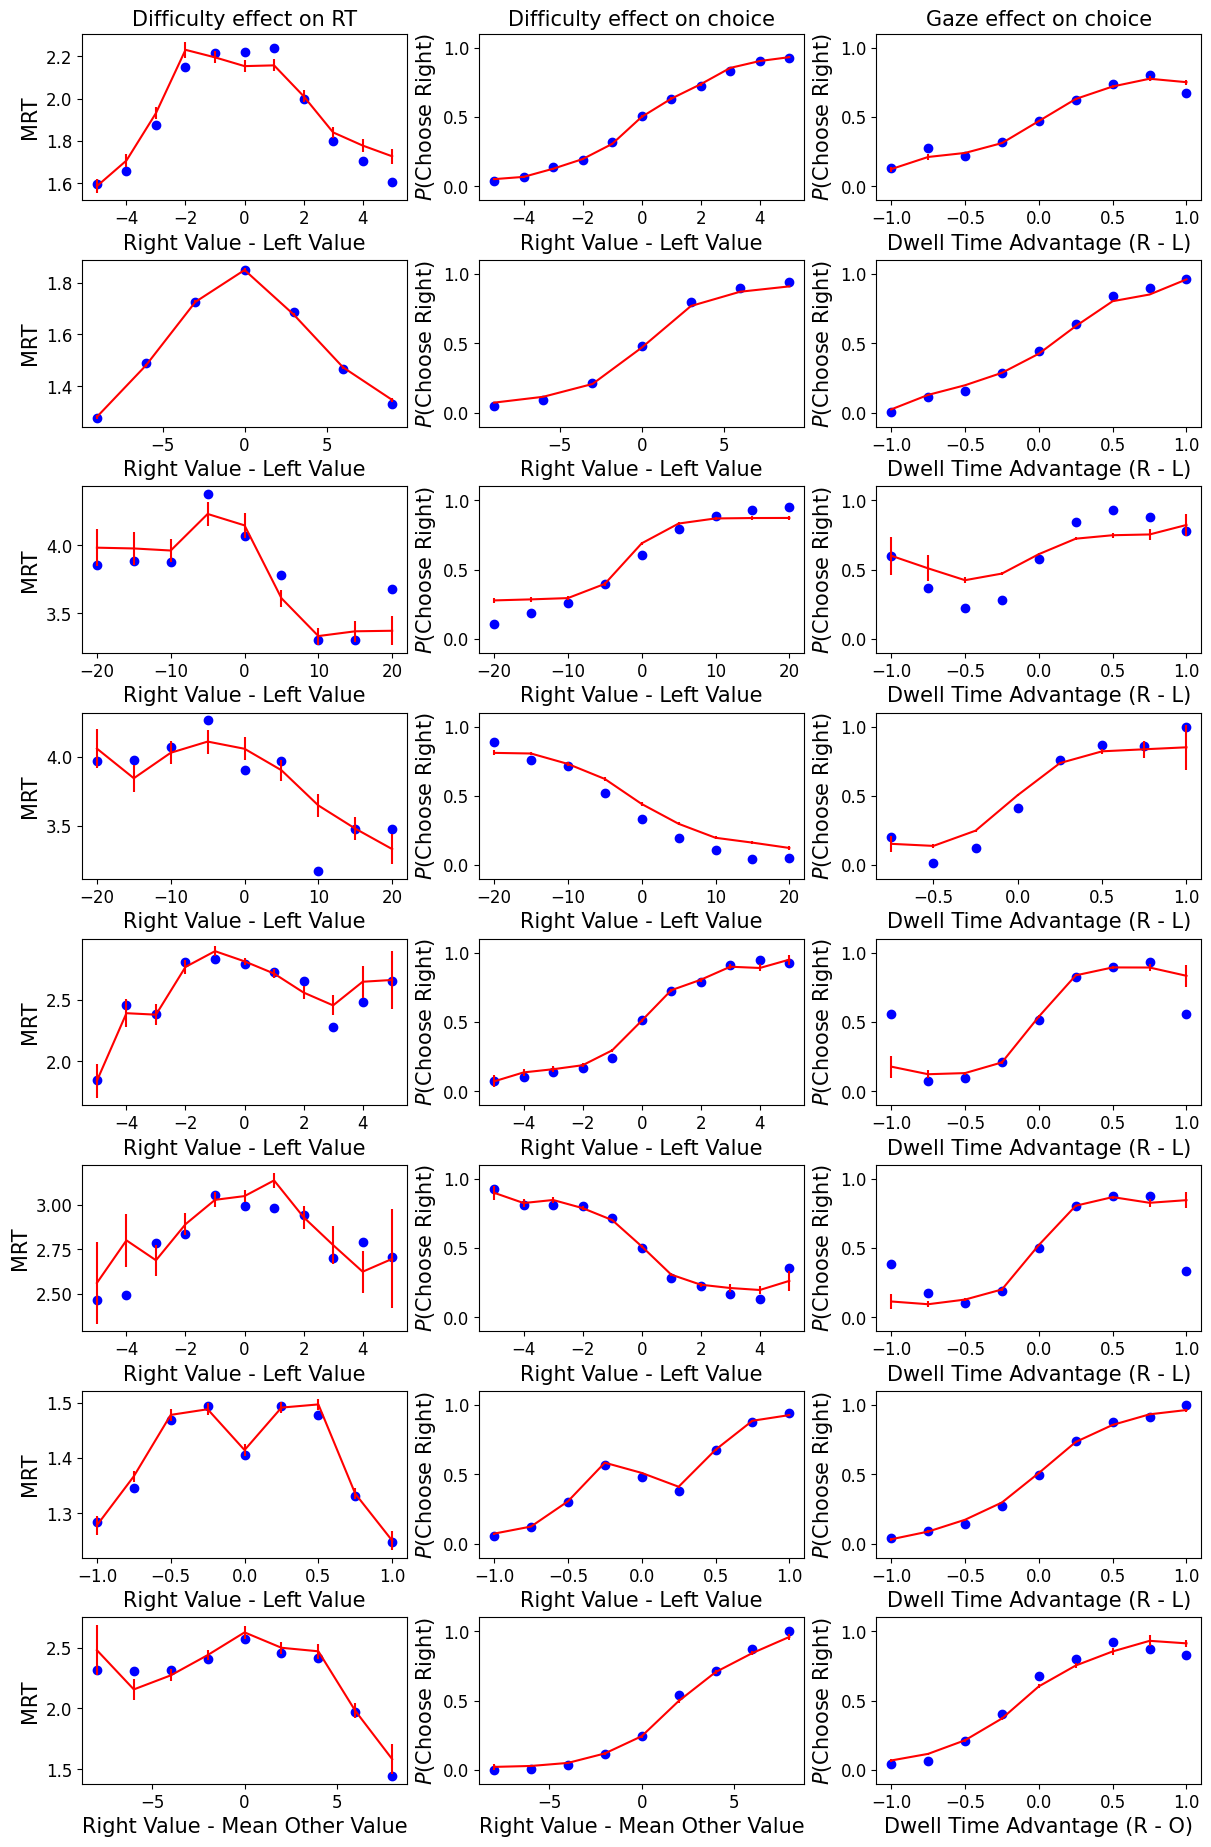

In [5]:
fig = plt.figure(figsize=(12, 20), layout='constrained')

n_rows = 9
n_cols = 3
start = 1

# fig = theory_plot(fig, n_rows, n_cols)

fig = prediction_plot(kr10_pred, kr10_data, fig, n_rows, n_cols, start, title=True)

fig = prediction_plot(tv_pred, tv_data, fig, n_rows, n_cols, start+1*3)

fig = prediction_plot(sp_perc_pred[sp_perc_pred['goal']==1], 
                      sp_perc_data[sp_perc_data['goal']==1], fig, n_rows, n_cols, start+2*3)
fig = prediction_plot(sp_perc_pred[sp_perc_pred['goal']==-1], 
                      sp_perc_data[sp_perc_data['goal']==-1], fig, n_rows, n_cols, start+3*3)

fig = prediction_plot(sp_value_pred[sp_value_pred['goal']==1], 
                      sp_value_data[sp_value_data['goal']==1], fig, n_rows, n_cols, start+4*3)
fig = prediction_plot(sp_value_pred[sp_value_pred['goal']==-1], 
                      sp_value_data[sp_value_data['goal']==-1], fig, n_rows, n_cols, start+5*3)

fig = prediction_plot(yang_pred, yang_data, fig, n_rows, n_cols, start+6*3)

fig = prediction_plot(kr11_pred, kr11_data, fig, n_rows, n_cols, start+7*3)

plt.savefig('../_01_Figures/goodness_of_fit.pdf', 
            dpi=600, 
            transparent=True, 
            bbox_inches='tight');